## Define Problem 

The purpose of this data sceice project is to come up with a Logistic regression model for predicting income level based on various factors including the individual’s education level, age, gender, occupation, and etc.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

## Import data 

In [114]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime 
import warnings 

C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [56]:
df = pd.read_csv('adult.csv')

## Preliminarily understand the whole dataframe 

In [55]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,NaN
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,NaN
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,NaN
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,NaN
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,NaN


In [47]:
df.shape

(48842, 15)

In [14]:
# Understand the date types of the whole dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### explore the categorical variables. 

In [18]:
# Understand the categorical columns and their associated 

cat_variables = list(df.select_dtypes(include=['object']).columns)
vn = pd.DataFrame(df[cat_variables].nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn = vn.sort_values(by='LevelsCount',ascending= False)
vn

,VarName,LevelsCount
7,native-country,42
1,education,16
3,occupation,15
0,workclass,9
2,marital-status,7
4,relationship,6
5,race,5
6,gender,2
8,income,2


In [19]:
# native-country
df['native-country'].value_counts(dropna=False)

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [20]:
df['education'].value_counts(dropna=False)

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [21]:
df['occupation'].value_counts(dropna=False)

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [17]:
# there is a ? categorical in workclass, which it should be named as missing value and filled by the most dominant categorical 
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [22]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [23]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [24]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [25]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [26]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## Univariate Analysis 

### Numerical Variables 

In [28]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

age
mean is:  38.64358543876172
std is:  13.71050993444322
min is:  17
max is:  90
1% quantile value is: 17.0
10% quantile value is: 22.0
90% quantile value is: 58.0
99% quantile value is: 74.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


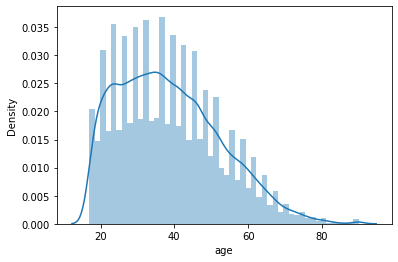


fnlwgt
mean is:  189664.13459727284
std is:  105604.02542315713
min is:  12285
max is:  1490400
1% quantile value is: 27166.0
10% quantile value is: 65738.20000000001
90% quantile value is: 328466.0
99% quantile value is: 509484.41999999987


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


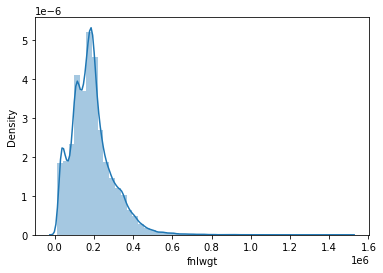


educational-num
mean is:  10.078088530363212
std is:  2.5709727555918307
min is:  1
max is:  16
1% quantile value is: 3.0
10% quantile value is: 7.0
90% quantile value is: 13.0
99% quantile value is: 16.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


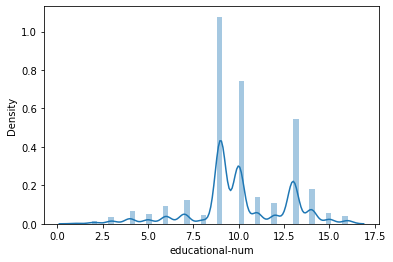


capital-gain
mean is:  1079.0676262233324
std is:  7452.019057653448
min is:  0
max is:  99999
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 15024.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


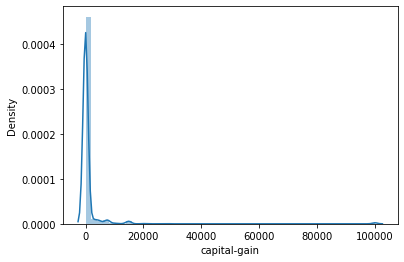


capital-loss
mean is:  87.50231358257237
std is:  403.0045521244552
min is:  0
max is:  4356
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 2001.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


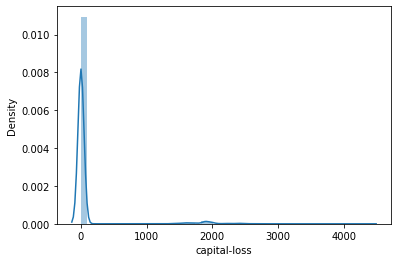


hours-per-week
mean is:  40.422382375824085
std is:  12.39144402425593
min is:  1
max is:  99
1% quantile value is: 8.0
10% quantile value is: 24.0
90% quantile value is: 55.0
99% quantile value is: 80.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


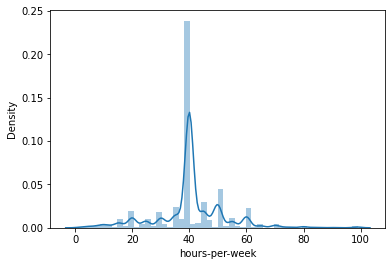

In [31]:
continous_variables = [i for i in df.select_dtypes(include=['int64'])]

for col in continous_variables:
    print(col)
    print("mean is: ", df[col].mean())
    print("std is: ", df[col].std())
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()

### Categorical Variables 

workclass


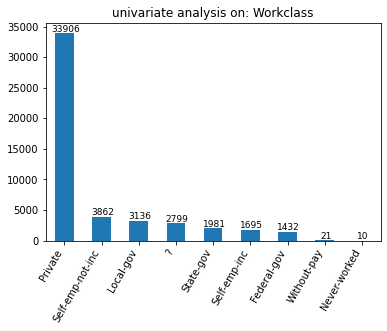


education


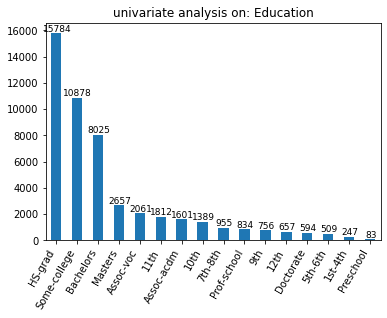


marital-status


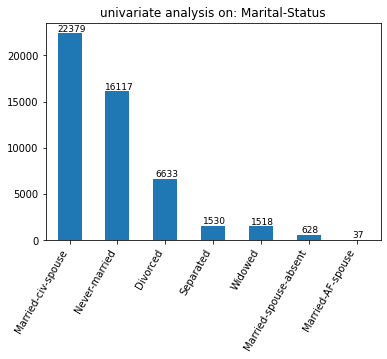


occupation


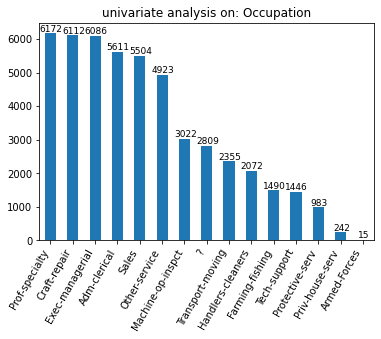


relationship


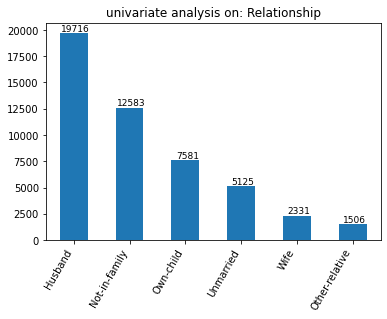


race


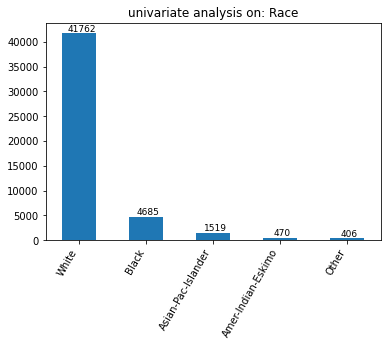


gender


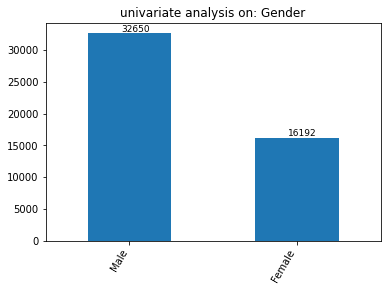


native-country


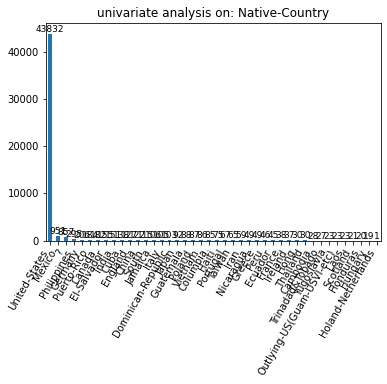


income


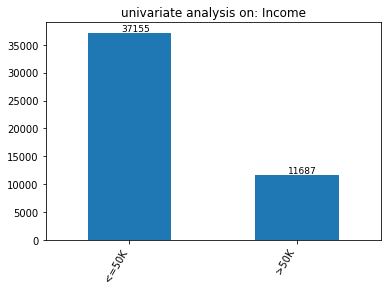

In [35]:
for col in cat_variables:
    print(col)
    df[col].value_counts().plot(kind = 'bar', title = "univariate analysis on: " + col.title() )
    
    for i, v in enumerate( list(df[col].value_counts())):
        plt.text(i+0.035, v, '%d' % v, ha='center', va= 'bottom',fontsize=9)
   
    plt.xticks(rotation = 60,ha = 'right')
    plt.show() 
    print()

## Bivariate Analysis

In [57]:
# Before the bivariate analysis, the target variable should be encoding into <= 50 is 0, > 50 = 1
df['income'].value_counts(dropna=False)

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [67]:
df['income_1'] =[0 if i == '<=50K'else 1 for i in df['income']] 

In [68]:
df['income_1']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income_1, Length: 48842, dtype: int64

### Numeric Variables

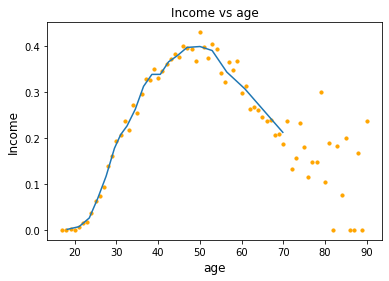

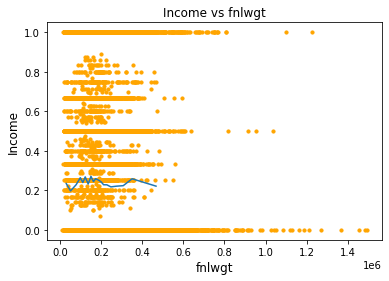

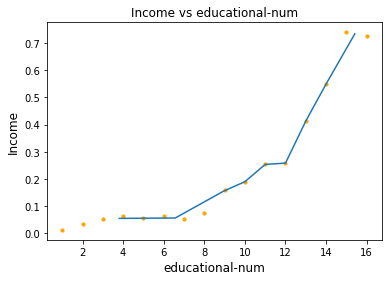

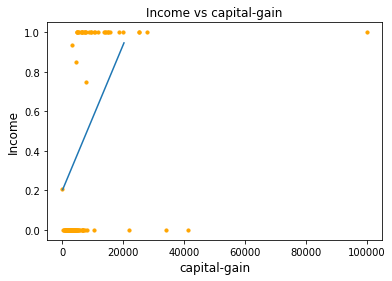

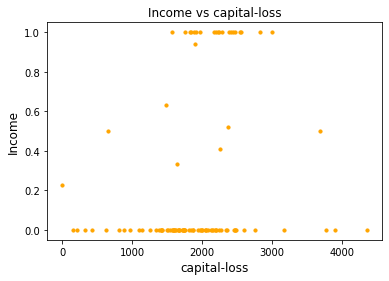

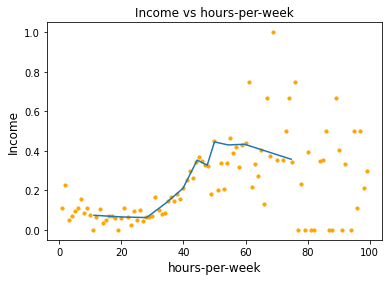

In [69]:
# study relationship of count and continous variables

for col in continous_variables:
    plt.subplot(111)
    a = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'income_1']].mean()
    plt.plot(a[col],a['income_1'])
    
    b = df.groupby([col],as_index=False)[['income_1']].mean()
    plt.scatter(b[col ],b['income_1'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("Income vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('Income',fontsize =12)
    plt.show()
    #plt.plot(grouped_df.index, grouped_df.values)

### Categorical Variables

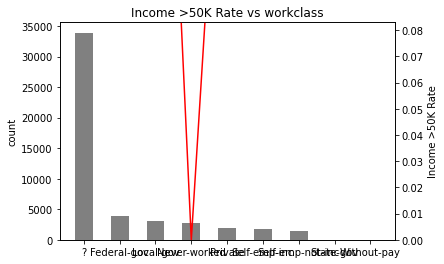

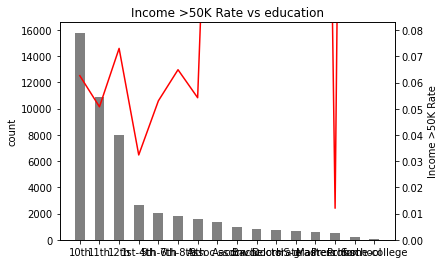

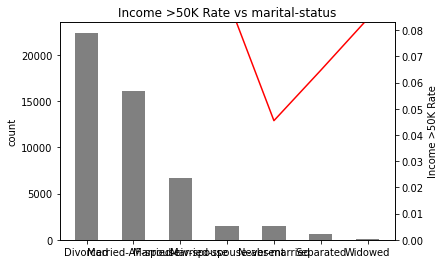

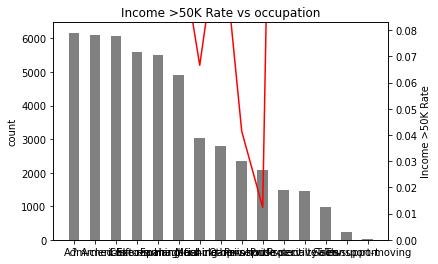

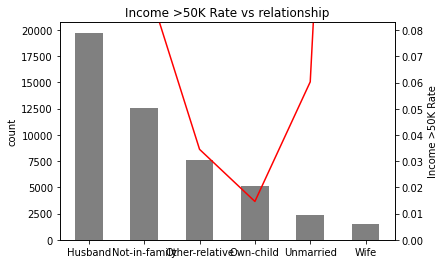

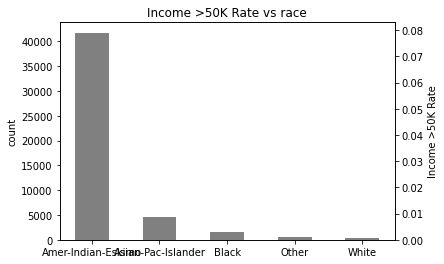

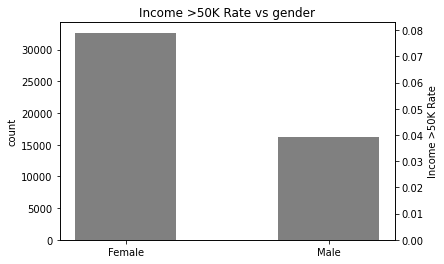

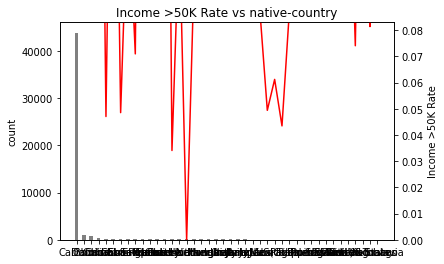

In [70]:
# study relationship of default rate and categorical variables
cat_variables.remove('income') 

for col in cat_variables:
    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    d = df[col].value_counts()
    ax1.bar(d.index,d, color = 'grey', width = 0.5)
    ax1.set_ylabel('count')
    
    ax2 = ax1.twinx()
    c = df.groupby([col],as_index=False)[['income_1']].mean()
    ax2.plot(c[col],c['income_1'],color='red')
    ax2.set_ylim([0, 0.083])
    ax2.set_ylabel('Income >50K Rate')
    
    plt.title("Income >50K Rate vs " + col)
    plt.xlabel(col, fontsize =12)

    plt.show()
    #sns.catplot(x=col, y="d90_flag", data=c, legend = True)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")

## Correlation Analysis 

<AxesSubplot:>

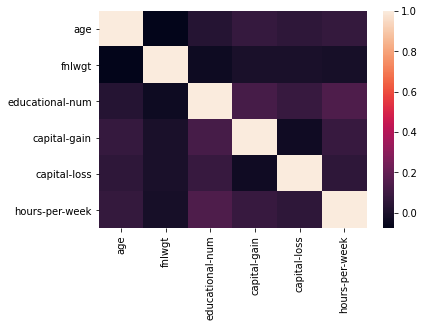

In [71]:
# pearson correlation
corr_matrix = df[continous_variables ].corr()
sns.heatmap(corr_matrix)

## Preprocessing the dataframe before modeling

### Deal with Missing Value 
In this dataframe, we understand that all the '?' symbol mean missing value, so the first step should be replaced them. 

In [84]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
income_1           0
dtype: int64

In [88]:
df= df.replace('?',np.nan)

In [89]:
# After replacing with np.nan, there are three columns with missing value 
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
income_1              0
dtype: int64

In [90]:
# workclass is the categorical varible and it will be filled with the most popular category. 
df['workclass']

0             Private
1             Private
2           Local-gov
3             Private
4                 NaN
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object

In [92]:
df[['workclass']] = df[['workclass']].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [93]:
# occupation is also the categorical varible and it will be filled with the most popular category. 
df['occupation']

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                      NaN
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object

In [95]:
df[['occupation']] = df[['occupation']].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [96]:
# native-country is also the categorical varible and it will be filled with the most popular category. 
df['native-country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: object

In [97]:
df[['native-country']] =df[['native-country']].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
## Get dummies for all categorical varialbe 

In [99]:
vn

,VarName,LevelsCount
7,native-country,42
1,education,16
3,occupation,15
0,workclass,9
2,marital-status,7
4,relationship,6
5,race,5
6,gender,2
8,income,2


In [100]:
df = pd.get_dummies(df,columns=['native-country','education','occupation','workclass','marital-status','relationship','race','gender'])

In [103]:
df.drop(columns= 'income',inplace=True)

In [104]:
df.shape

(48842, 106)

## Build Machine Learning Model 

### Separate the datafram into test and train set

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'income_1'),
                                                   df.income_1, test_size = 0.2, random_state = 47)

C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [109]:
# define an empty dictionary to store all the model 
model_list = {}

### Apply the data for machine learning model 

In [111]:
%%time
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train, y_train)


{'C': 0.1}
Wall time: 2.82 s


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
model_list['logit_model'] = logit_model

In [124]:
%%time
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)

{'max_depth': 8, 'n_estimators': 500}
Wall time: 2min 39s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
model_list['rf_model'] = rf_model

### Model Evaluation 

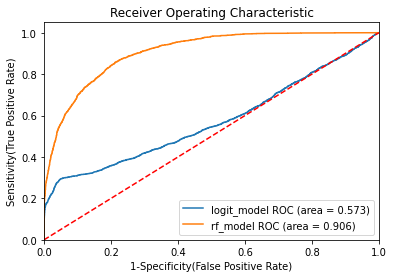

In [126]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
    a = X_test
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [127]:
auc = pd.DataFrame()
for name, model in model_list.items():
    train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
    test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    auc.at[name, "t  rain_auc"] = '{0:.4f}'.format(train_auc)
    auc.at[name, "test_auc"] = '{0:.4f}'.format(test_auc)
auc

,t rain_auc,test_auc
logit_model,0.5772,0.5732
rf_model,0.9136,0.9061


In [128]:
for name, model in model_list.items():
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(sklearn.metrics.classification_report(y_test, y_pred))

logit_model
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7525
           1       0.70      0.26      0.38      2244

    accuracy                           0.80      9769
   macro avg       0.76      0.61      0.63      9769
weighted avg       0.79      0.80      0.77      9769

rf_model
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7525
           1       0.80      0.52      0.63      2244

    accuracy                           0.86      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.86      0.85      9769



## Feature Importance

In [129]:
y = df.income_1
X = df.drop(columns='income_1')

In [130]:
def feature(name, model, X_train):
    series = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns))
    series.sort_values(ascending=False)[:25].plot(kind='bar',figsize=(10,10))
    plt.xticks(rotation = 60,ha = 'right')
    plt.title("Feature Importance of "+name, fontsize=15)
    plt.show()

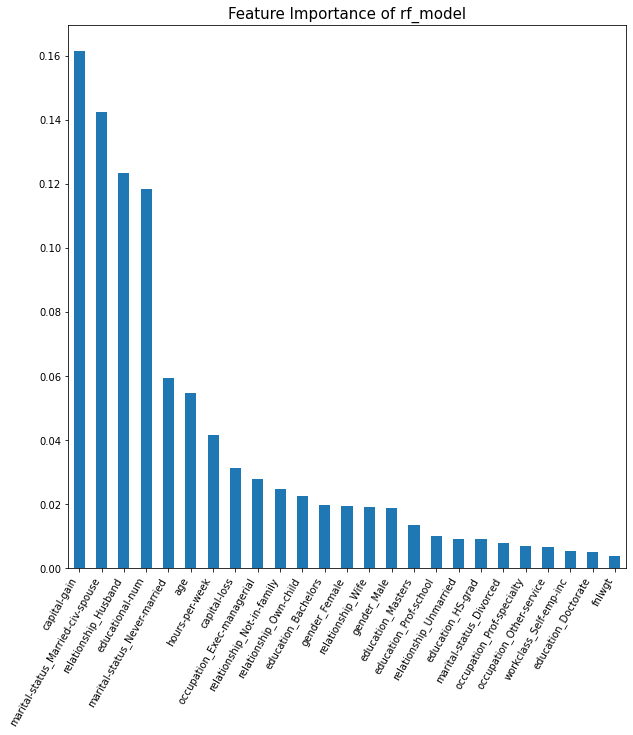

In [131]:
for name, model in model_list.items():
    if name =='rf_model':
        feature(name, model, X_train)

## Conclusion 

The random forest model achieve much better performance, so we explore the feature inportant in this model. From the above plot, we clearly understand that variables including 'capital-gain','marital-status_Married-civ-spouse','relationship_Husband','educational-num','marital-status_Never-married ','age','hours-per-week ','capital-loss ','occupation_Exec-managerial'

In [137]:
def feature(name, model, X_train):
    series = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns))
    a= series.sort_values(ascending=False)[:25]
    print(a)

In [138]:
for name, model in model_list.items():
    if name =='rf_model':
        feature(name, model, X_train)

capital-gain                         0.161542
marital-status_Married-civ-spouse    0.142249
relationship_Husband                 0.123225
educational-num                      0.118443
marital-status_Never-married         0.059491
age                                  0.054567
hours-per-week                       0.041669
capital-loss                         0.031350
occupation_Exec-managerial           0.027909
relationship_Not-in-family           0.024903
relationship_Own-child               0.022605
education_Bachelors                  0.019829
gender_Female                        0.019534
relationship_Wife                    0.019064
gender_Male                          0.018932
education_Masters                    0.013509
education_Prof-school                0.009977
relationship_Unmarried               0.009027
education_HS-grad                    0.009011
marital-status_Divorced              0.007874
occupation_Prof-specialty            0.007016
occupation_Other-service          